## 实验目的

用给定的数据预测一定范围内的液化程度

## 实验简介

这是一个多分类问题，液化程度只与液化系数相关，可以用knn进行分类

## 数据描述

数据包括范围和点集，其中点集中的每个点给定坐标、该点的液化系数和液化程度

数据散点图如下：

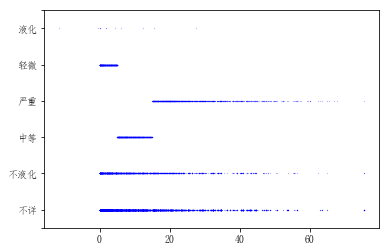

In [51]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import shapefile
from pylab import mpl

sfPoint = shapefile.Reader('data/液化/液化.shp')

#read index of points
features = sfPoint.shapeRecords()[:]
index = []
for feature in features:
    tmp = feature.shape.__geo_interface__['coordinates']
    index.append(tmp)
index = np.array(index)

#read labels of points and translate to int
#不详 不液化 中等 严重 轻微 液化 
recds = sfPoint.records()
set3, count3 = [], 0
for i in recds:
    if i[3] not in set3:
        set3.append(i[3])
        count3 += 1
dic = {}
for i in range(len(set3)):
    dic[set3[i]] = i
nums = np.array(recds[:], dtype=np.string_)[:, 2]
labels = np.array(recds[:], dtype=np.string_)[:, 3]
for i in range(len(set3)):
    labels[labels == set3[i]] = i
nums = nums.astype(np.float)
labels = labels.astype(np.float)
#show data
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
fg = plt.figure()
ax = plt.subplot(111)
plt.scatter(nums[:], labels[:], c='b',s=0.01)
ax.set_yticks([-0.5, 0.0, 1.0, 4.0, 2.0, 3.0, 5.0, 5.5])
ax.set_yticklabels(labels=['', '不详','不液化','轻微','中等','严重','液化', ""])
figure_fig = plt.gcf()  # 'get current figure'
figure_fig.savefig('./result/data.eps', format='eps', dpi=1000)
figure_fig.savefig('./result/data.jpg', format='jpg', dpi=1000)
plt.show()

## 主要任务

用knn训练给定数据，预测给定范围内的坐标点的液化程度，转换为图片展示出来

## 主要代码解释（代码结构，主要代码解释）

### 代码结构

1)导入相关库

2)从shp文件中读入数据，并整理其格式方便后续操作

3)计算给定范围坐标点的最大最小值，生成测试点的坐标即测试数据

4)训练svc模型，输入测试数据进行预测，根据预测结果进行调参

5)展示结果并保存图片

6)对训练结果进行准确性评分

### 主要代码及注释

#### 导入相关库

In [57]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import shapefile
from pylab import mpl
from sklearn.metrics import accuracy_score

#### 从shp文件中导入数据，转换为array结构

In [40]:
sfArea = shapefile.Reader('data/范围/范围.shp')
sfPoint = shapefile.Reader('data/液化/液化.shp')

In [41]:
#read index of points
features = sfPoint.shapeRecords()[:]
index = []
for feature in features:
    tmp = feature.shape.__geo_interface__['coordinates']
    index.append(tmp)
index = np.array(index)

#read labels of points and translate to int
#不详 不液化 中等 严重 轻微 液化 
recds = sfPoint.records()
set3, count3 = [], 0
for i in recds:
    if i[3] not in set3:
        set3.append(i[3])
        count3 += 1
dic = {}
for i in range(len(set3)):
    dic[set3[i]] = i
nums = np.array(recds[:], dtype=np.string_)[:, 2]
labels = np.array(recds[:], dtype=np.string_)[:, 3]
for i in range(len(set3)):
    labels[labels == set3[i]] = i
nums = nums.astype(np.float)
labels = labels.astype(np.float)

#### 计算最大最小值，生成测试数据

In [53]:
#create test data
xx_min, xx_max = min(nums), max(nums)
xx = np.arange(xx_min, xx_max, 0.01)
nums = nums.reshape(-1, 1)
labels = labels.reshape(-1, 1)

#### 训练svc模型，导入测试数据进行预测

将不详作为预测结果的一类

In [54]:
#train model and predict
knn = neighbors.KNeighborsClassifier()
knn.fit(nums, labels.ravel())
predict = knn.predict(xx.reshape(-1, 1))

#### 用matplotlib画图

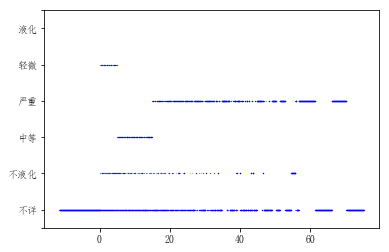

In [55]:
#show result
fg = plt.figure()
ax = plt.subplot(111)
plt.scatter(xx[:], predict[:], c='b',s=0.01)
ax.set_yticks([-0.5, 0.0, 1.0, 4.0, 2.0, 3.0, 5.0, 5.5])
ax.set_yticklabels(labels=['', '不详','不液化','轻微','中等','严重','液化', ""])
figure_fig = plt.gcf()  # 'get current figure'
figure_fig.savefig('./result/result1.eps', format='eps', dpi=1000)
figure_fig.savefig('./result/result1.jpg', format='jpg', dpi=1000)
plt.show()

#### 对预测精确度进行评分

In [60]:
#caculate the accuracy score
y_true = np.copy(labels)
y_pred = np.array(knn.predict(nums))
print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))

Accuracy:  0.6905703371087729


不将不详作为预测结果的一类

In [62]:
#remove part of train data
nums = nums[labels != 0.0]
labels = labels[labels != 0.0]

#create test data
xx_min, xx_max = min(nums), max(nums)
xx = np.arange(xx_min, xx_max, 0.01)
nums = nums.reshape(-1, 1)
labels = labels.reshape(-1, 1)

In [63]:
#train model and predict
knn = neighbors.KNeighborsClassifier()
knn.fit(nums, labels.ravel())
predict = knn.predict(xx.reshape(-1, 1))

#### 用matplotlib画图

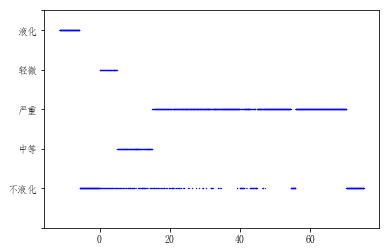

In [64]:
#show result
fg = plt.figure()
ax = plt.subplot(111)
plt.scatter(xx[:], predict[:], c='b',s=0.01)
ax.set_yticks([0.0, 1.0, 4.0, 2.0, 3.0, 5.0, 5.5])
ax.set_yticklabels(labels=['', '不液化','轻微','中等','严重','液化', ""])
figure_fig = plt.gcf()  # 'get current figure'
figure_fig.savefig('./result/result2.eps', format='eps', dpi=1000)
figure_fig.savefig('./result/result2.jpg', format='jpg', dpi=1000)
plt.show()
plt.show()

#### 对预测精确度进行评分

In [65]:
#caculate the accuracy score
y_true = np.copy(labels)
y_pred = np.array(knn.predict(nums))
print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))

Accuracy:  0.7115559599636033


## 案例总结

本案例的难点在于：shp文件的读取 切割边缘

解决方法

 - shp文件的读取：导入shapefile库进行读取，能够方便的读取点的坐标信息和属性
 
 - 切割边缘：从shp文件中读取形状数据，然后将形状中的点首尾相连，再用set_clip_path函数进行切割

## 参考资料

 - 《利用Python进行数据分析》
 - [Reads and writes ESRI Shapefiles][2]
 - [matplotlib basemap 绘制多边形区域曲线][3]

  [1]: https://www.cnblogs.com/nwpuxuezha/p/6618205.html
  [2]: https://github.com/GeospatialPython/pyshp
  [3]: https://blog.csdn.net/u011077672/article/details/77753300
  [4]:https://blog.csdn.net/ericcchen/article/details/79334042
  [5]:https://www.cnblogs.com/pinard/p/6126077.html